# Постановка задачи

Из кинопроката стали уходить зрители. Каждый месяц. Немного, но заметно. Маркетологи кинотеатров посчитали: сохранять текущих зрителей дешевле, чем привлекать новых.

Нужно спрогнозировать, будет ли фильм популярным у зрителей или нет. Вам предоставлены исторические данные о фильмах и их рейтингах.

Примечание: данные синтетические и используются в учебных целях.

Описание данных

Признаки:
star_rating – рейтинг фильма
title – название фильма
content_rating – возрастной рейтинг
genre – жанр фильма
duration – продолжительность в минутах
actors_list – список актеров

Целевой признак:
star_rating (можем считать высокий рейтинг > 8.0 как "популярный")

# Подключение библиотек

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
import numpy as np
import pandas as pd

In [14]:
import seaborn as sns

In [15]:
df = pd.read_csv("2_imdb_1000.csv")

# Начало изучения

In [16]:
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [19]:
df.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

Вывод: В данных есть 3 пропущенных значения в столбце content_rating (возрастной рейтинг). Остальные столбцы заполнены полностью. Это нужно учесть при дальнейшем анализе.

In [21]:
df.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [22]:
# Анализ категориальных признаков
df.describe(include="O")

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,Dracula,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


In [23]:
# Проверка на дубликаты
df.duplicated().sum()

0

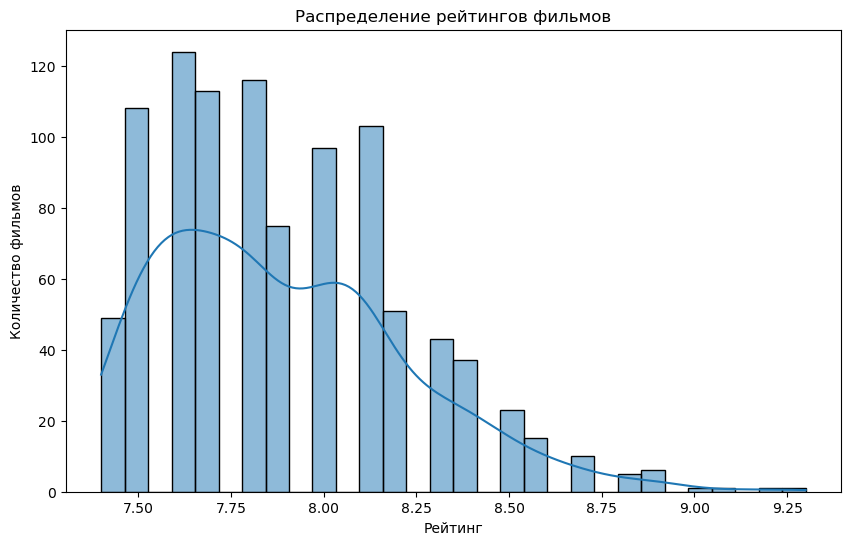

In [27]:
# Распределение рейтингов фильмов
plt.figure(figsize=(10, 6))
sns.histplot(df['star_rating'], bins=30, kde=True)
plt.title('Распределение рейтингов фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

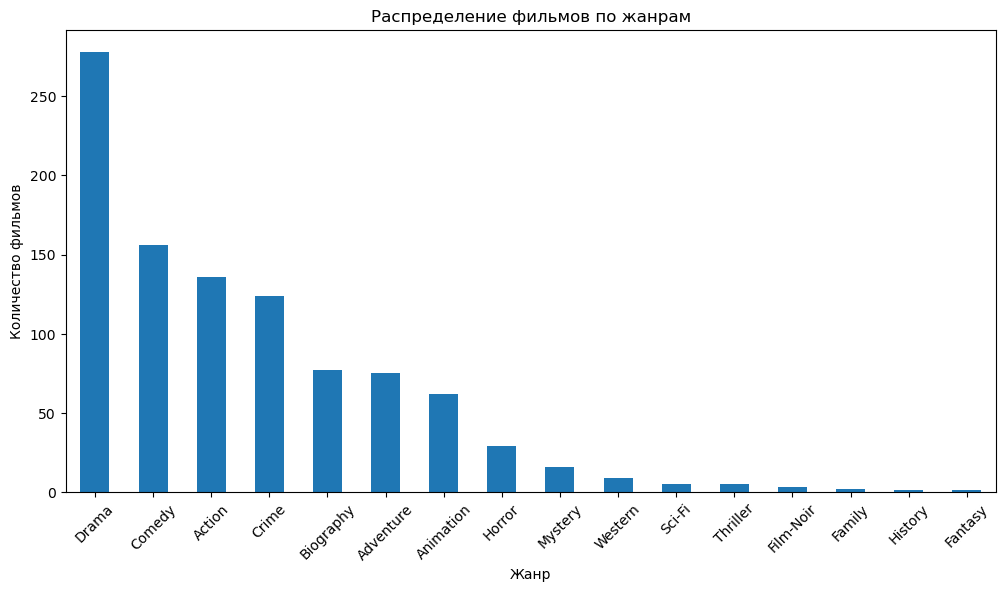

In [28]:
# Распределение фильмов по жанрам
plt.figure(figsize=(12, 6))
df['genre'].value_counts().plot(kind='bar')
plt.title('Распределение фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

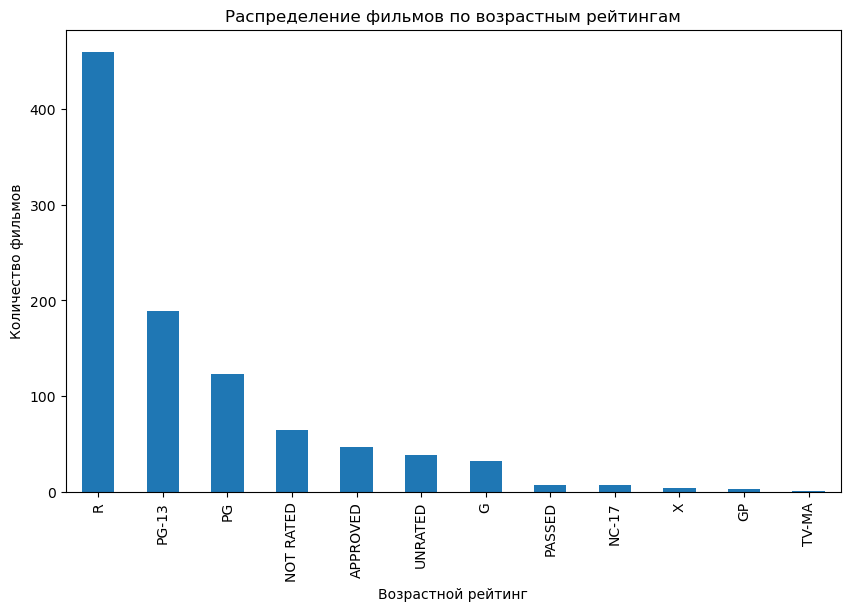

In [29]:
# Распределение возрастных рейтингов
plt.figure(figsize=(10, 6))
df['content_rating'].value_counts().plot(kind='bar')
plt.title('Распределение фильмов по возрастным рейтингам')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

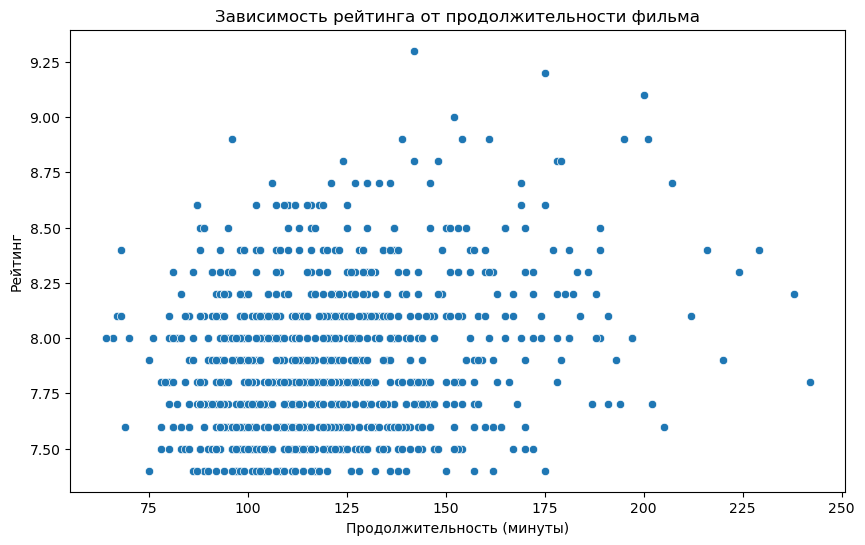

In [30]:
# Взаимосвязь продолжительности и рейтинга фильмов
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration', y='star_rating')
plt.title('Зависимость рейтинга от продолжительности фильма')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Рейтинг')
plt.show()

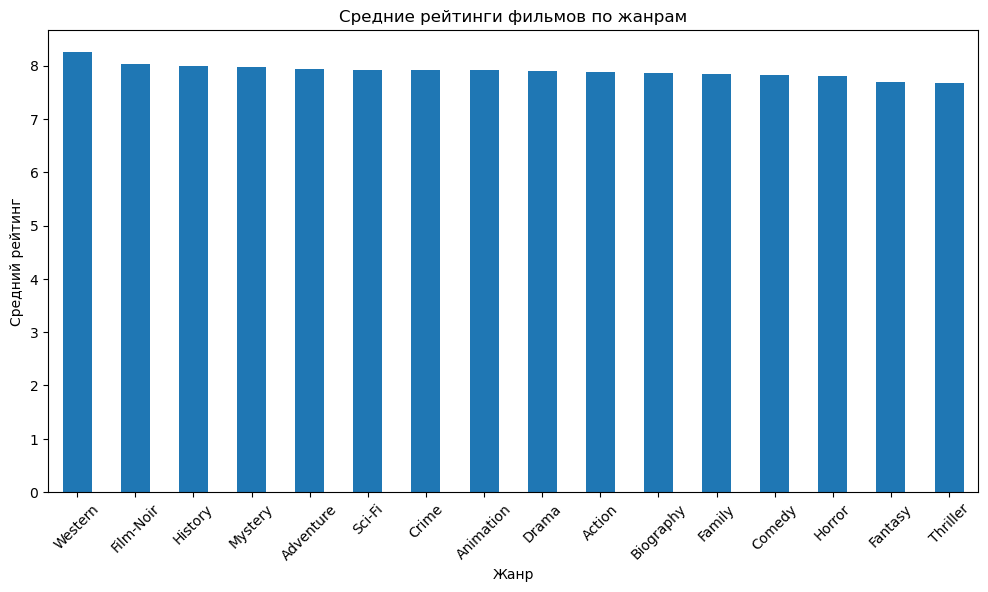

In [31]:
# Средние рейтинги по жанрам
plt.figure(figsize=(12, 6))
df.groupby('genre')['star_rating'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Средние рейтинги фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг')
plt.xticks(rotation=45)
plt.show()

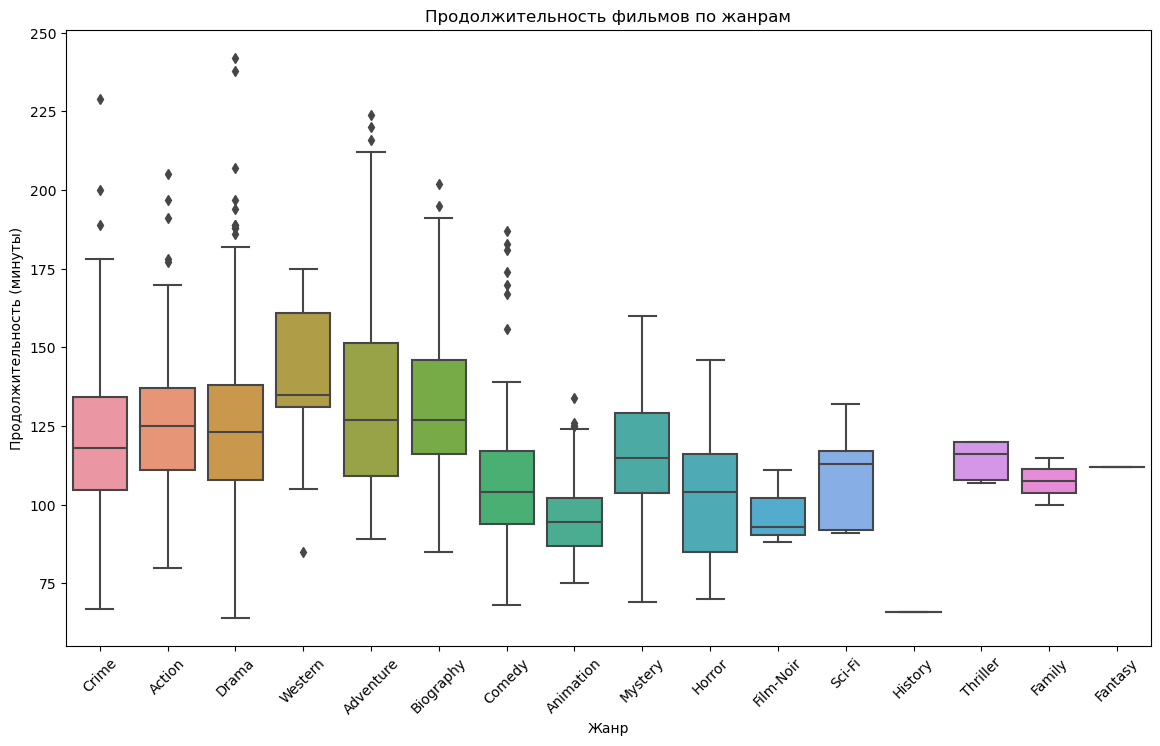

In [32]:
# Распределение продолжительности фильмов по жанрам
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='genre', y='duration')
plt.title('Продолжительность фильмов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продолжительность (минуты)')
plt.xticks(rotation=45)
plt.show()

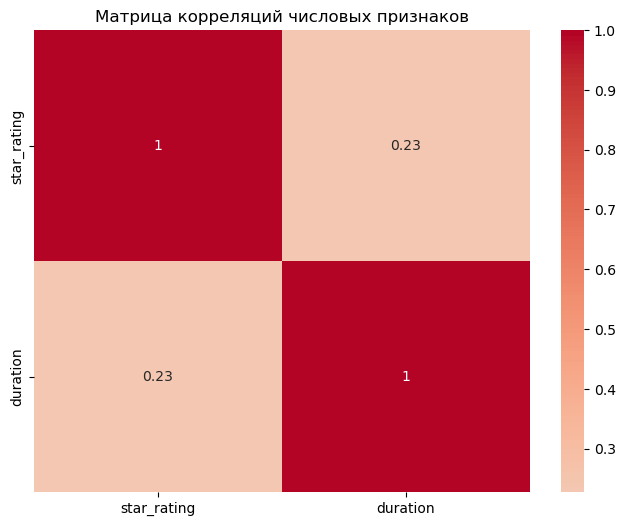

In [33]:
# Матрица корреляций
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

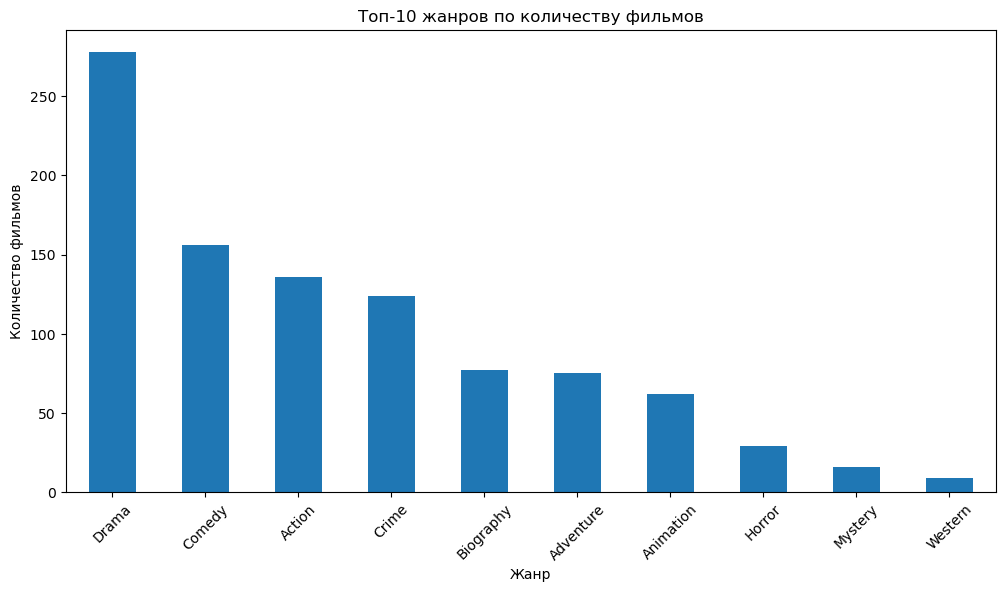

In [35]:
# Топ-10 жанров по количеству фильмов
plt.figure(figsize=(12, 6))
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Топ-10 жанров по количеству фильмов')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Создание целевого признака для бинарной классификации
df['high_rating'] = (df['star_rating'] > 8.0).astype(int)
print("Распределение целевого признака (high_rating):")
df['high_rating'].value_counts()

Распределение целевого признака (high_rating):


high_rating
0    682
1    297
Name: count, dtype: int64

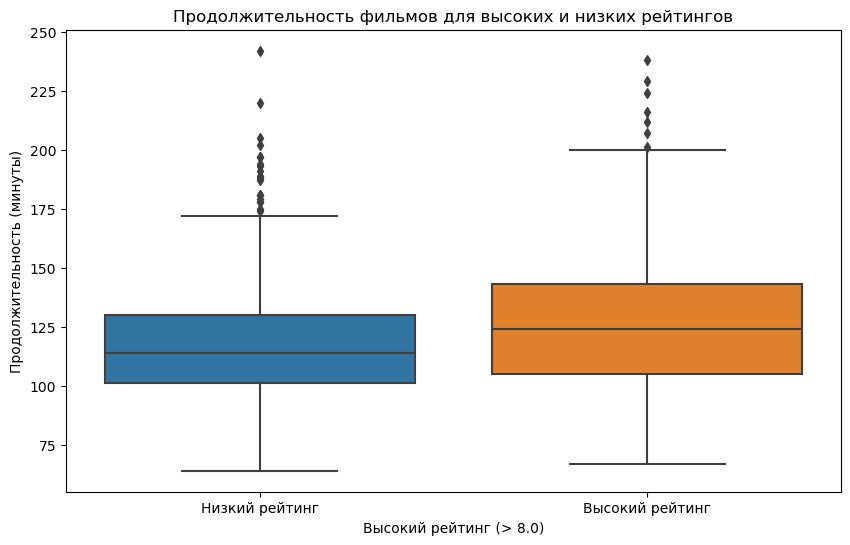

In [37]:
# Сравнение продолжительности фильмов для высоких и низких рейтингов
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='high_rating', y='duration')
plt.title('Продолжительность фильмов для высоких и низких рейтингов')
plt.xlabel('Высокий рейтинг (> 8.0)')
plt.ylabel('Продолжительность (минуты)')
plt.xticks([0, 1], ['Низкий рейтинг', 'Высокий рейтинг'])
plt.show()

<Figure size 1200x600 with 0 Axes>

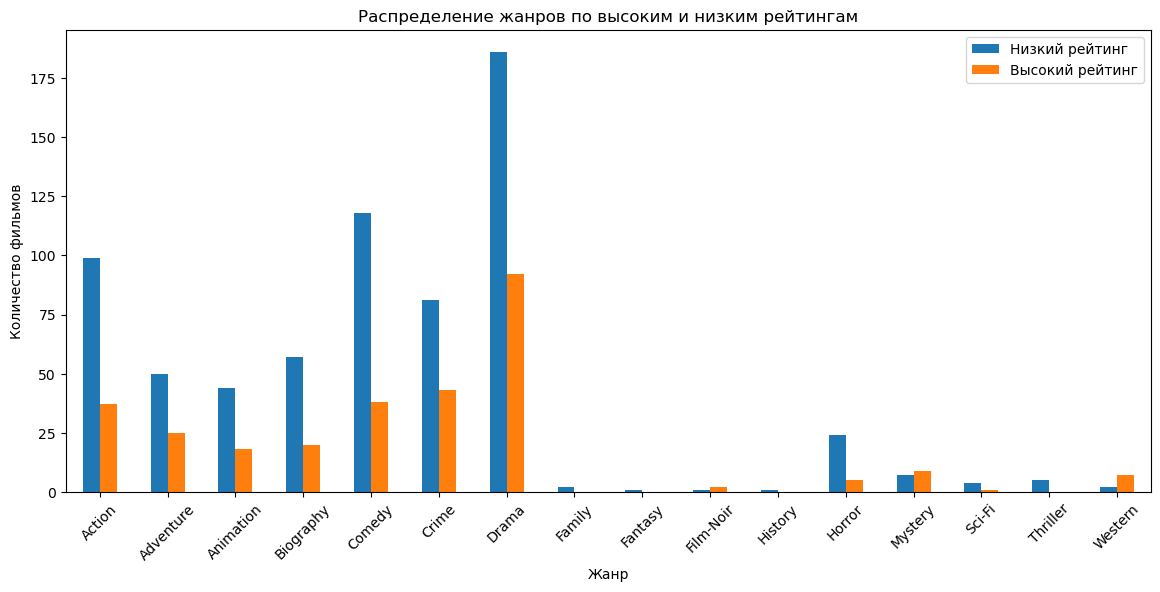

In [38]:
# Распределение жанров для высоких и низких рейтингов
plt.figure(figsize=(12, 6))
pd.crosstab(df['genre'], df['high_rating']).plot(kind='bar', figsize=(14, 6))
plt.title('Распределение жанров по высоким и низким рейтингам')
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.legend(['Низкий рейтинг', 'Высокий рейтинг'])
plt.xticks(rotation=45)
plt.show()

In [39]:
# Анализ распределения целевого признака
print("Распределение популярных фильмов:")
popular_count = df['high_rating'].value_counts()
print(popular_count)
print(f"\nДоля популярных фильмов: {popular_count[1]/len(df):.2%}")


Распределение популярных фильмов:
high_rating
0    682
1    297
Name: count, dtype: int64

Доля популярных фильмов: 30.34%


In [40]:
# Статистики продолжительности для популярных и непопулярных фильмов
duration_stats = df.groupby('high_rating')['duration'].describe()
print("Статистики продолжительности фильмов:")
print(duration_stats)

Статистики продолжительности фильмов:
             count        mean        std   min     25%    50%    75%    max
high_rating                                                                 
0            682.0  117.967742  23.704659  64.0  101.25  114.0  130.0  242.0
1            297.0  127.895623  30.157680  67.0  105.00  124.0  143.0  238.0


In [41]:
# Топ жанров среди популярных фильмов
popular_genres = df[df['high_rating'] == 1]['genre'].value_counts().head(10)
print("Топ-10 жанров среди популярных фильмов:")
print(popular_genres)

Топ-10 жанров среди популярных фильмов:
genre
Drama        92
Crime        43
Comedy       38
Action       37
Adventure    25
Biography    20
Animation    18
Mystery       9
Western       7
Horror        5
Name: count, dtype: int64


In [42]:
# Возрастные рейтинги популярных фильмов
popular_ratings = df[df['high_rating'] == 1]['content_rating'].value_counts()
print("Распределение возрастных рейтингов среди популярных фильмов:")
print(popular_ratings)

Распределение возрастных рейтингов среди популярных фильмов:
content_rating
R            117
NOT RATED     44
PG            38
PG-13         36
APPROVED      24
UNRATED       16
G             13
PASSED         5
X              1
TV-MA          1
GP             1
Name: count, dtype: int64


На основе анализа исторических данных о фильмах можно спрогнозировать вероятность того, будет ли фильм популярным у зрителей. Ключевые выводы для прогнозирования показывают, что жанр фильма является наиболее важным фактором - драмы имеют наибольшее количество популярных фильмов, за ними следуют криминальные фильмы и комедии. Продолжительность также влияет на популярность - популярные фильмы в среднем немного длиннее непопулярных, что указывает на slightly higher chance более длинных фильмов стать популярными. Возрастной рейтинг играет значительную роль - фильмы с рейтингом "R" составляют большинство среди популярных, являясь основным возрастным рейтингом для высокорейтинговых картин. Базовая вероятность популярности составляет 30%, что следует учитывать как базу при прогнозировании. Для точного прогнозирования популярности нового фильма рекомендуется анализировать комбинацию этих факторов - жанр, продолжительность и возрастной рейтинг вместе, что позволяет получить более надежный прогноз.